# Detecting Fraudulent ATM transactions project

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv("instance_scores.csv")
lambdawts = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test_data = pd.read_csv("test_share.csv")
train_data = pd.read_csv('train.csv')

In [3]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(test_data.shape)
print()
print(train_data.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


In [4]:
print(geo.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(instance.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(lambdawts.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(qset.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(test_data.info())
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (to

In [5]:
print(geo.nunique())
print("*********************************")
print(instance.nunique())
print("*********************************")
print(lambdawts.nunique())
print("*********************************")
print(qset.nunique())
print("*********************************")
print("Test_data[Group]:",test_data['Group'].nunique())
print("*********************************")
print("Train_data[Group]:",train_data['Group'].nunique())

id           284807
geo_score     25523
dtype: int64
*********************************
id                 284807
instance_scores     11158
dtype: int64
*********************************
Group        1400
lambda_wt    1400
dtype: int64
*********************************
id                      284807
qsets_normalized_tat     24832
dtype: int64
*********************************
Test_data[Group]: 915
*********************************
Train_data[Group]: 1301


In [6]:
train_data['from']='train'
test_data['from']="test"

In [7]:
Total_data=pd.concat([train_data,test_data],axis=0)

In [8]:
Total_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,from
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [9]:
Total_data['from'].value_counts()

from
train    227845
test      56962
Name: count, dtype: int64

In [10]:
Total_data['Group'].nunique()

1400

In [11]:
print(geo.isnull().sum())
print("*****************************")
print(instance.isnull().sum())
print("*****************************")
print(lambdawts.isnull().sum())
print("*****************************")
print(qset.isnull().sum())
print("*****************************")
print(Total_data.isnull().sum())

id               0
geo_score    71543
dtype: int64
*****************************
id                 0
instance_scores    0
dtype: int64
*****************************
Group        0
lambda_wt    0
dtype: int64
*****************************
id                           0
qsets_normalized_tat    103201
dtype: int64
*****************************
id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target  

In [12]:
print(geo.describe())
print("###########################")
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
###########################
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


<Axes: >

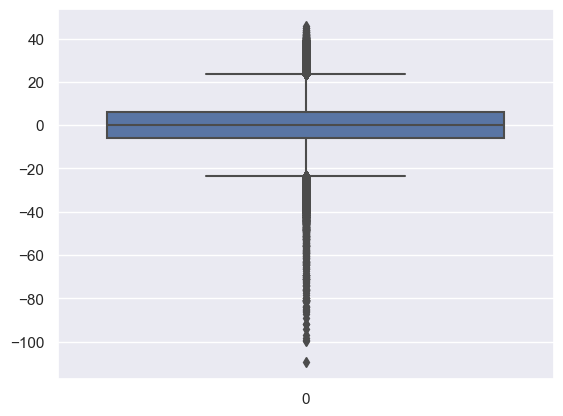

In [13]:
sns.boxplot(geo['geo_score'])

0.18

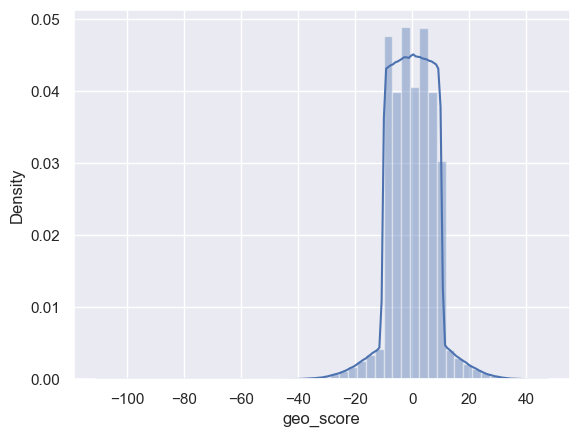

In [14]:
sns.distplot(geo['geo_score'])
geo['geo_score'].median()

<Axes: >

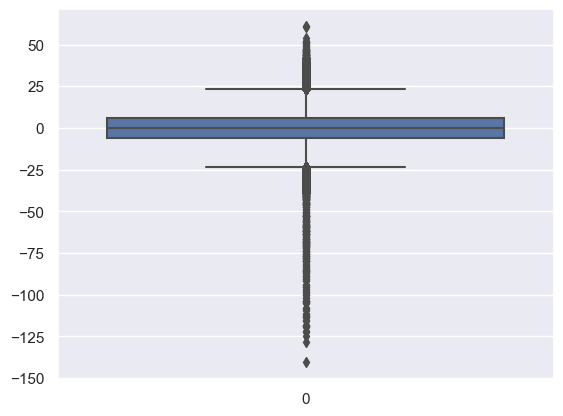

In [15]:
sns.boxplot(qset['qsets_normalized_tat'])

0.0199999999999997

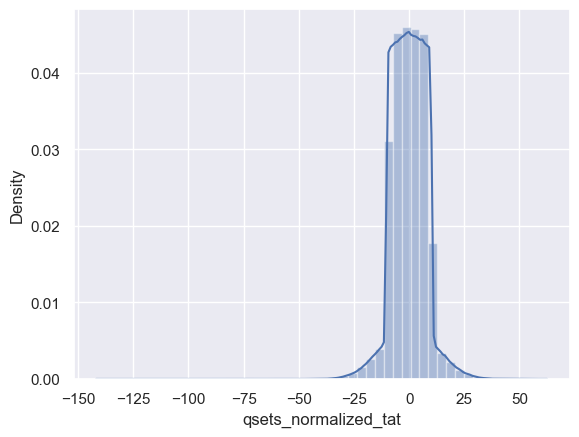

In [16]:
sns.distplot(qset['qsets_normalized_tat']) 
qset['qsets_normalized_tat'].median()

In [17]:
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [18]:
print(geo['geo_score'].isna().sum())
print(qset['qsets_normalized_tat'].isna().sum())

0
0


In [19]:
print(geo.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(instance.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(lambdawts.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(qset.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(test_data.columns)
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(train_data.columns)

Index(['id', 'geo_score'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['id', 'instance_scores'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['Group', 'lambda_wt'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['id', 'qsets_normalized_tat'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'from'],
      dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&**************************&&&&&&&&&&&&&&&&&&&&&&&&&

In [20]:
print(geo['id'].nunique())
print(geo['id'].count())
print(geo[geo['id']==1])

284807
1424035
         id  geo_score
52266     1       3.79
1140856   1       0.18
1163171   1      -1.72
1266260   1      -6.72
1422560   1      10.00
